# Single Parameter Bayesian Statistics

This serves as a basic introduction to Bayesian analysis using R, all contained in a nice Jupyter notebook. I am writing these as I myself learn the main concepts. 

First lets start by looking at a biased coin toss and how to plot a binomial distribution of that. After that we will look at prior probabilities and how they affect our likelihood function and our resultant posterior probability density function (pdf).

Mandatory Reading:

* Data Analyasis: A Bayesian Tutorial, D. S. Sivia, J. Skilling.

Additional Reading:

* Probability Theory, E. T. Jaynes

Both of these books should be stocked by any self-respecting academic institution!


In [1]:
#Lets declare a function which samples our biased coin toss.
#All heads would be at 0 on our binomial distribution.
#All tails would be at 1.
FlipCoin = function(n) sample(c("Heads","Tails"), n, rep=T,prob = c(0.55,0.45))
No_of_tosses = 100
#Lets flip that coin a few times...
C = FlipCoin(No_of_tosses)
    
#Plot a table of the results
table(C)
    

C
Heads Tails 
   58    42 

In [2]:
# Lets look at the probabilities now:
prop.table(table(C))

C
Heads Tails 
 0.58  0.42 

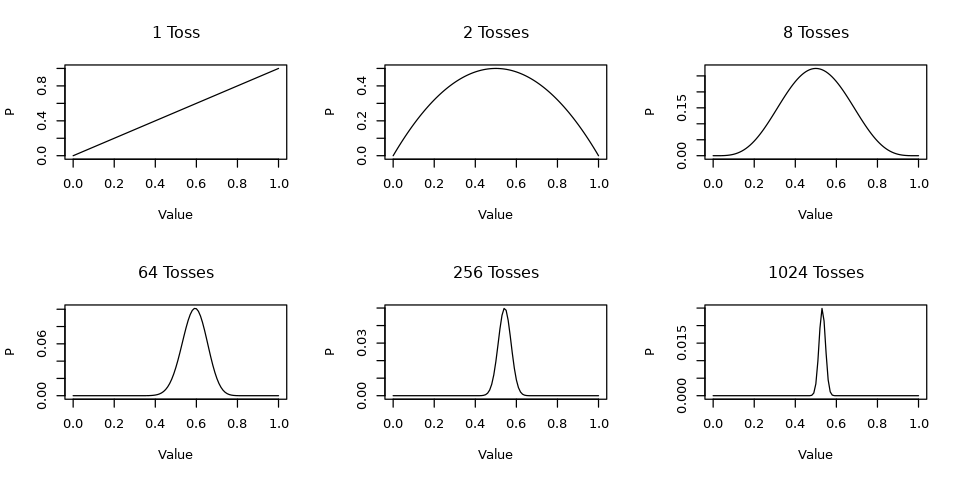

In [3]:
library(repr)
#Plot binomial distribution of the coin toss for different values:
calcLikelihood <- function(successes,total,title_str){
    options(repr.plot.width=8,repr.plot.height=4,jupyter.plot_mimetypes = 'image/png')
    curve(dbinom(successes,total,x),xlab='Value',ylab='P')
    title(main=title_str)
}
par(mfrow=c(2,3))

No_of_tosses = 1
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"1 Toss")
No_of_tosses = 2
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"2 Tosses")
No_of_tosses = 8
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"8 Tosses")
No_of_tosses = 64
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"64 Tosses")
No_of_tosses = 256
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"256 Tosses")
No_of_tosses = 1024
C = FlipCoin(No_of_tosses)
calcLikelihood(sum(C=="Heads"),No_of_tosses,"1024 Tosses")




# Prior Probabilities

As we can see, when the sample number increases we feel more confident in declaring what the likely true value is, hence the range of the probability becomes a lot smaller. Most people know this from doing maths as a teenager, but lets explore how prior assumptions affect our probability density function! Thus we will go from a frequentist interpretation of probability into the world of Bayesian inference.

First lets plot several prior probability density functions:

* A completely uniform probability. This reflects no prior understanding of how the coin is biased.
* A fair coin. 
* A poor estimate of the bias.
* A good estimate of the bias.

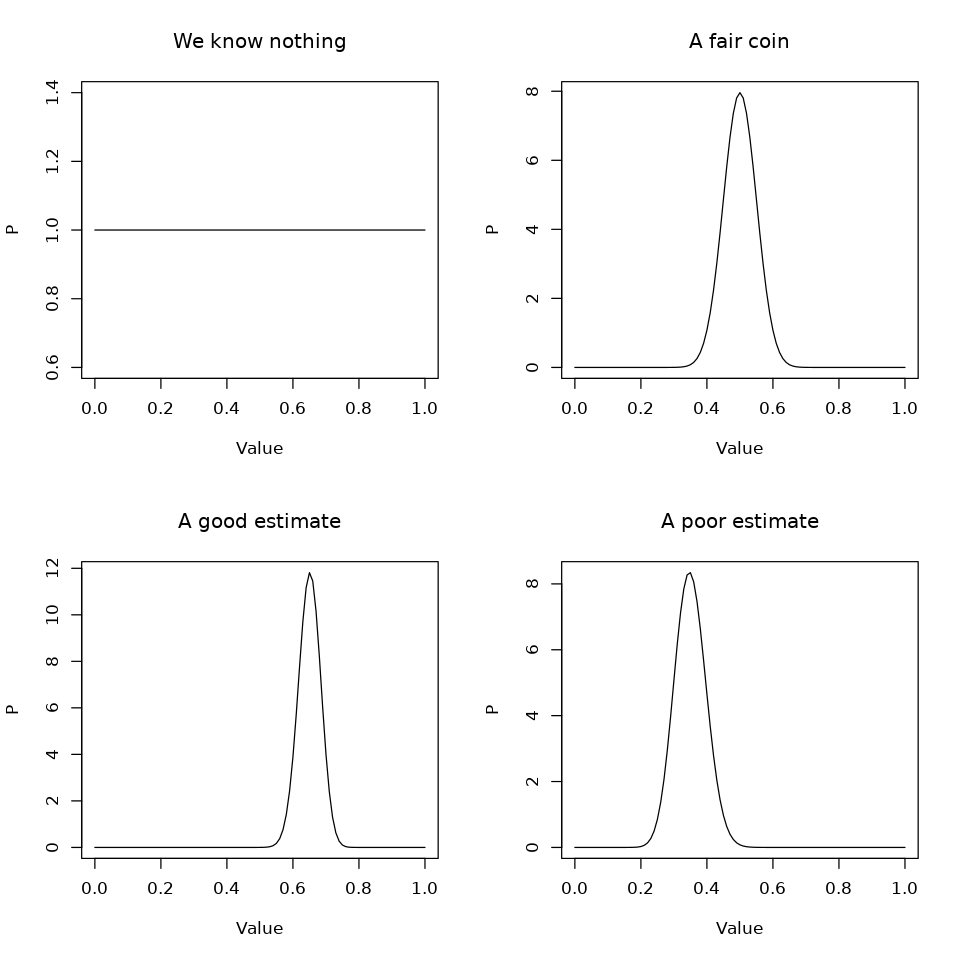

In [4]:
# This assumes a completely naive understanding of the biasing of the coin.
par(mfrow=c(2,2))
options(repr.plot.width=8,repr.plot.height=8)
curve(dunif(min=0,max=1,x),main="We know nothing",xlab="Value",ylab="P")
# This assumes a fair coin, not one of those Las vegas coins Sivia warns us about!
curve(dbeta(x,50,50),main="A fair coin",xlab="Value",ylab="P")
# This assumes a pretty good guess of where the coins bias lies
curve(dbeta(x,130,70),main="A good estimate",xlab="Value",ylab="P")
# This assumes a poor estimate of where the bias lies
curve(dbeta(x,35,65),main="A poor estimate",xlab="Value",ylab="P")

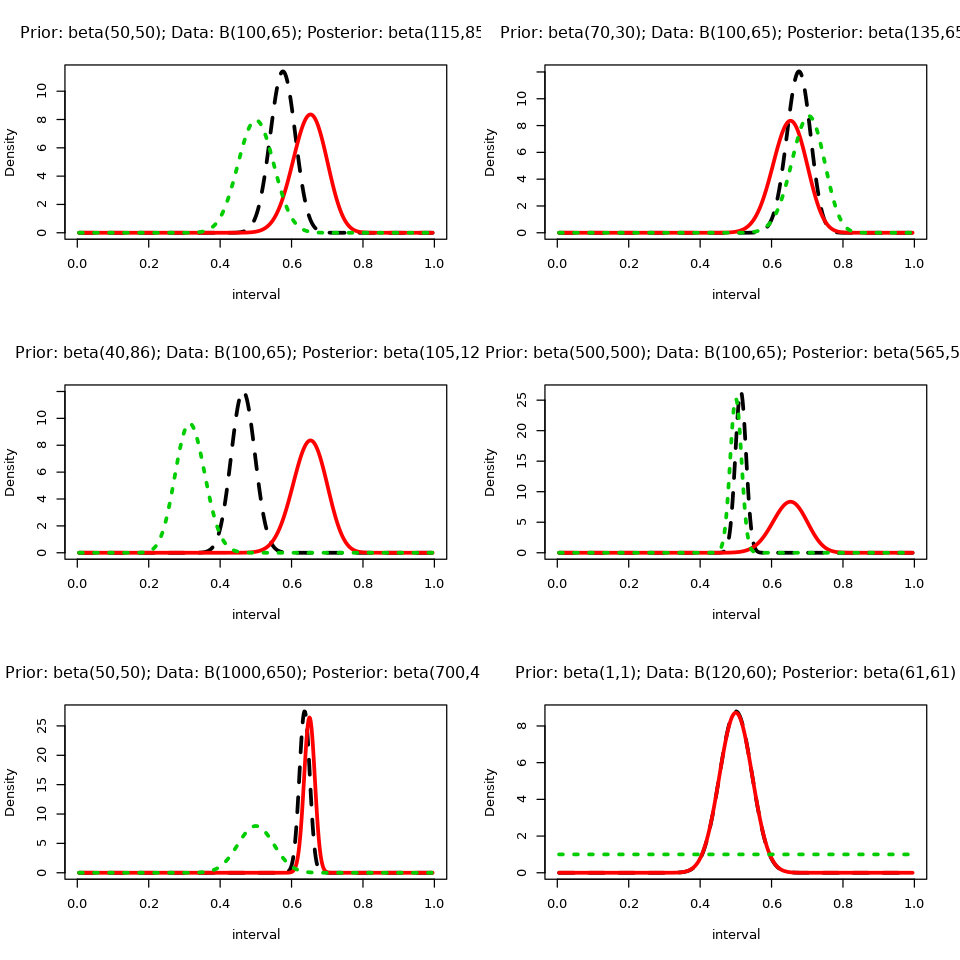

In [25]:
#Lets use the LearnBayes library for this.
library(LearnBayes)
########################################################################
##### Let's calculate a posterior probability for the above priors: ####
########################################################################



## For the first example lets assume a completely fair coin:
prior = dbeta(interval,50,50)


CalculatePosterior = function(successes_data,failures_data,successes_prior,failures_prior) {
    
    ## This defines a base to plot the density curves on.
    interval = seq(0.005, 0.995, length = 500)
    
    
    prior = dbeta(interval,successes_prior, failures_prior) # Calculate a prior pdf
    likelihood = dbeta(interval,successes_data,failures_data)# Calculate a pdf for our likelihood.

    # THE IMPORTANT BIT: To get our posterior, just add the beta prior and  beta likelihood together. 
    # i.e: Add the number of predicted successes and number of actual successes together.
    posterior = dbeta(interval,successes_prior+successes_data,failures_prior+failures_data) 

    m.orig = apply( cbind(prior, likelihood, posterior), 2, max)
    m = max(c(prior, likelihood, posterior))

    plot(interval, posterior, type = "l", ylab = "Density", lty = 2, lwd = 3,
        main = paste("Prior: beta(", round(successes_prior,2), ",", round(failures_prior,2), "); Data: B(", successes_data+failures_data, ",", successes_data, "); ",
        "Posterior: beta(", round(successes_prior+successes_data,2), ",", round(failures_data+failures_prior,2), ")", sep=""), ylim = c(0, m), col = 1)
    lines(interval, likelihood, lty = 1, lwd = 3, col = 2)
        lines(interval, prior, lty = 3, lwd = 3, col = 3)
    
}


par(mfrow=c(3,2))
#Assume a fair coin. 
CalculatePosterior(65,35,50,50)
#A good prior estimate.
CalculatePosterior(65,35,70,30)
#A poor prior estimate.
CalculatePosterior(65,35,40,86)

#A heavily weighted fair prior estimate. 65 heads/35 tails. But our prior is heavily in favour of a fair coin.
CalculatePosterior(65,35,500,500)
#A heavily weighted data set. 650 tails/350 tails. 
CalculatePosterior(650,350,50,50)
#A uniform prior. The As posterior is proportional to Prior * Likelihood. The posterior is now proportional to likelihood only.
CalculatePosterior(60,60,1,1)
